<a href="https://colab.research.google.com/github/dyncsystem/ComputerVision/blob/main/Canny.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving images.jfif to images.jfif


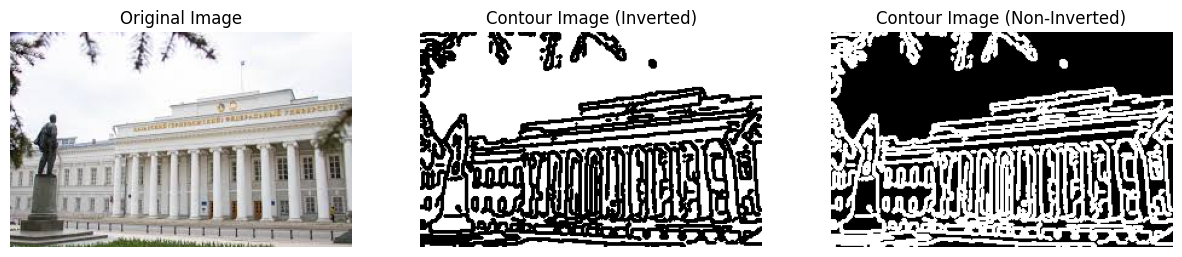

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

uploaded = files.upload()

image_path = next(iter(uploaded))
image = cv2.imread(image_path)

height, width = image.shape[:2]

blured_image = cv2.GaussianBlur(image, (7, 7), 0)
edges = cv2.Canny(blured_image, 30, 70)
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

black_image = np.zeros((height, width, 3), dtype=np.uint8)
cv2.drawContours(black_image, contours, -1, (255, 255, 255), 2)

drawing = cv2.bitwise_not(black_image)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Contour Image (Inverted)')
plt.imshow(drawing, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Contour Image (Non-Inverted)')
plt.imshow(black_image)
plt.axis('off')

plt.show()